# Problem: Expansion

An expansion classification model helps a SaaS startup identify existing customers with the highest potential for upselling or cross-selling, effectively targeting resources to maximize customer lifetime value. By predicting which customers are likely to purchase additional services or upgrade their plans, the model addresses the 'expansion problem' of optimizing revenue growth from the current customer base.

$$ \text{Expansion}_i = \frac{P_i(t+1) \cdot V_{i}(t+1)}{P_{i}(t) \cdot V_{i}(t)} $$


# Import

In [62]:
def import_data():
    import pandas as pd
    file_path = '/Users/patricksweeney/growth/05_Expansion/02_Nonparametric expansion prediction/Expansion train.xlsx'
    data = pd.read_excel(file_path)  # Corrected method name here
    return data

data = import_data()
data.head()

,workspace_id,product,mrr_converted,mrr,expansion,annual,churned,start_date,end_date,t,...,tag_count_f,insight_count_f,reel_created_count_f,page_user_count_f,shared_object_note_count_f,shared_object_highlight_count_f,shared_object_tag_count_f,shared_object_insight_count_f,comment_count_f,reel_viewed_count_f
0,02deacf1-5198-483d-9bca-376ad30c22dd,Team,250.0,350.0,0.40,0,0,2022-02-11,2023-12-27,684,...,1.220760,0.264620,0.010234,1.494152,0.077485,0.0,0.00731,0.097953,0,0.067251
1,2f32ad80-80cf-454c-83b1-55d40e9c684b,Starter,18.0,18.0,0.00,0,1,2022-12-09,2023-03-08,89,...,0.146067,0.516854,0.000000,0.280899,0.000000,0.0,0.00000,0.000000,0,0.000000
2,2f671c70-030b-4202-a5fd-d6cb53b410a9,Starter,25.0,25.0,0.00,1,0,2023-11-03,2024-01-10,68,...,0.867647,0.044118,0.000000,0.867647,0.000000,0.0,0.00000,0.000000,0,0.014706
3,2fa16073-c492-45fe-8158-84ee254ff324,Team,200.0,270.0,0.35,1,1,2021-10-01,2023-07-03,548,...,0.235401,0.045620,0.000000,0.025547,0.000000,0.0,0.00000,0.001825,0,0.000000
4,38a47213-69f6-483d-8bf6-7d89d6951e7d,Starter,50.0,50.0,0.00,0,0,2023-05-08,2024-01-10,247,...,3.210526,0.052632,0.012146,0.570850,0.008097,0.0,0.00000,0.008097,0,0.000000


### Check data

In [ ]:
def find_missing_values(data):
    missing_values = data.isnull().sum()
    print("Features with missing values are...")
    print(missing_values)

find_missing_values(data)

# Feature engineering

In [63]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(data, exclude):
    # Ensure that 'data' is a pandas DataFrame
    if not isinstance(data, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame.")

    # Validate 'exclude' as a list
    if not isinstance(exclude, list):
        raise TypeError("'exclude' must be a list of columns.")

    # Select string and categorical columns to encode, excluding the specified columns
    columns_to_encode = data.select_dtypes(include=['object', 'category']).columns
    columns_to_encode = [col for col in columns_to_encode if col not in exclude]

    # Apply OneHotEncoder
    encoder = OneHotEncoder(sparse=False, drop='if_binary')
    encoded_data = pd.DataFrame(encoder.fit_transform(data[columns_to_encode]))

    # Fix column names after encoding
    encoded_data.columns = encoder.get_feature_names_out(columns_to_encode)

    # Drop original columns and concatenate encoded data
    data = data.drop(columns_to_encode, axis=1)
    data = pd.concat([data, encoded_data], axis=1)

    return data


data = one_hot_encode(data, ['workspace_id'])
data.head()

/Users/patricksweeney/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,workspace_id,mrr_converted,mrr,expansion,annual,churned,start_date,end_date,t,project_count_r,...,shared_object_note_count_f,shared_object_highlight_count_f,shared_object_tag_count_f,shared_object_insight_count_f,comment_count_f,reel_viewed_count_f,product_Business,product_Enterprise,product_Starter,product_Team
0,02deacf1-5198-483d-9bca-376ad30c22dd,250.0,350.0,0.40,0,0,2022-02-11,2023-12-27,684,6,...,0.077485,0.0,0.00731,0.097953,0,0.067251,0.0,0.0,0.0,1.0
1,2f32ad80-80cf-454c-83b1-55d40e9c684b,18.0,18.0,0.00,0,1,2022-12-09,2023-03-08,89,27,...,0.000000,0.0,0.00000,0.000000,0,0.000000,0.0,0.0,1.0,0.0
2,2f671c70-030b-4202-a5fd-d6cb53b410a9,25.0,25.0,0.00,1,0,2023-11-03,2024-01-10,68,68,...,0.000000,0.0,0.00000,0.000000,0,0.014706,0.0,0.0,1.0,0.0
3,2fa16073-c492-45fe-8158-84ee254ff324,200.0,270.0,0.35,1,1,2021-10-01,2023-07-03,548,264,...,0.000000,0.0,0.00000,0.001825,0,0.000000,0.0,0.0,0.0,1.0
4,38a47213-69f6-483d-8bf6-7d89d6951e7d,50.0,50.0,0.00,0,0,2023-05-08,2024-01-10,247,69,...,0.008097,0.0,0.00000,0.008097,0,0.000000,0.0,0.0,1.0,0.0


### Drop variables

In [64]:
def drop_variables(data, variables):
    import pandas as pd

    # Ensure 'data' is a pandas DataFrame
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data must be a pandas DataFrame")

    # Ensure 'variables' is a list
    if not isinstance(variables, list):
        raise ValueError("variables must be a list")

    # Drop the specified variables
    return data.drop(variables, axis=1, errors='ignore')  # 'errors=ignore' will ignore any non-existent columns in 'variables'


data = drop_variables(data, ['mrr', 'mrr_converted'])

### Histogram

In [ ]:
def zipf_plot_with_best_fit(data, variable, cuts):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np

    # Check if the variable and cuts exist in the DataFrame
    if variable not in data.columns:
        raise ValueError(f"The variable '{variable}' does not exist in the DataFrame.")
    if cuts not in data.columns:
        raise ValueError(f"The cuts column '{cuts}' does not exist in the DataFrame.")

    # Filter out zero or negative values
    filtered_data = data[data[variable] > 0]

    # Sort the data by the variable in descending order and rank them
    sorted_data = filtered_data.sort_values(by=variable, ascending=False)
    sorted_data['rank'] = np.arange(1, len(sorted_data) + 1)

    # Get unique categories in 'cuts'
    categories = sorted_data[cuts].unique()

    # Create a subplot for each category
    n_categories = len(categories)
    fig, axs = plt.subplots(n_categories, 1, figsize=(8, 6 * n_categories))

    for i, category in enumerate(categories):
        category_data = sorted_data[sorted_data[cuts] == category]

        # Scatter plot for this category
        axs[i].scatter(category_data['rank'], category_data[variable], alpha=0.5)

        # Calculate and plot the line of best fit
        log_ranks = np.log(category_data['rank'])
        log_values = np.log(category_data[variable])
        m, b = np.polyfit(log_ranks, log_values, 1)
        axs[i].plot(category_data['rank'], np.exp(m*log_ranks + b), color='red')  # Convert back to linear scale

        # Setting the log scale for both axes
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')

        axs[i].set_title(f'Zipf Plot with Best Fit Line for {variable} - {category}')
        axs[i].set_xlabel('Rank')
        axs[i].set_ylabel('Frequency')
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

# Example usage
zipf_plot_with_best_fit(data, 'expansion', 'product')


### Make expansion categorical

In [73]:
def make_categorical(data, variable):
    import numpy as np
    import pandas as pd

    # Check if the variable exists in the DataFrame
    if variable not in data.columns:
        raise ValueError(f"The variable '{variable}' does not exist in the DataFrame.")

    # Make a copy of the DataFrame to avoid modifying the original data
    df = data.copy()

    # Calculate the quantile for non-Red values
    non_red_quantile = df[df[variable] > 0][variable].quantile(0.5)

    # Define categories
    conditions = [
        (df[variable] <= 0),                              # Condition for 'Red' (No expansion)
        (df[variable] > 0) & (df[variable] < non_red_quantile),  # Condition for 'Yellow' (Yellow expansion)
        (df[variable] >= non_red_quantile)                  # Condition for 'Green' (Green expansion)
    ]
    choices = ['Red', 'Yellow', 'Green']

    # Apply categories and create a new column 'expansion_cat'
    df['expansion_cat'] = np.select(conditions, choices)

    return df

data = make_categorical(data, 'expansion')
data.head()
data.tail()


,workspace_id,expansion,annual,churned,start_date,end_date,t,project_count_r,transcription_count_r,note_count_r,...,shared_object_highlight_count_f,shared_object_tag_count_f,shared_object_insight_count_f,comment_count_f,reel_viewed_count_f,product_Business,product_Enterprise,product_Starter,product_Team,expansion_cat
6738,b6054004-37f2-40e0-868e-824c44fcac41,0.500000,1,0,2021-11-30,2024-01-10,739,33,20,20,...,0.002706,0.000000,0.000000,0,0.009472,0.0,0.0,0.0,1.0,Green
6739,b6e736f2-cbea-4b87-ae64-68f65af7f3e4,0.000000,0,1,2023-02-07,2023-04-20,72,72,72,72,...,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,1.0,0.0,Red
6740,b8917309-ef71-4708-a3cc-5e0a270d9c0f,-0.333333,0,0,2023-01-06,2024-01-10,369,241,300,241,...,0.000000,0.000000,0.089431,0,0.000000,0.0,0.0,1.0,0.0,Red
6741,ba2a50c6-e795-4246-adc5-43368986249d,2.000000,1,0,2022-06-23,2024-01-10,566,31,119,31,...,0.007067,0.005300,0.022968,0,0.001767,0.0,0.0,1.0,0.0,Green
6742,0b669cda-d713-48ee-945f-a76c89620e8d,0.633333,0,0,2022-12-16,2024-01-04,384,91,209,28,...,0.002604,0.002604,0.075521,0,0.041667,0.0,0.0,0.0,1.0,Green


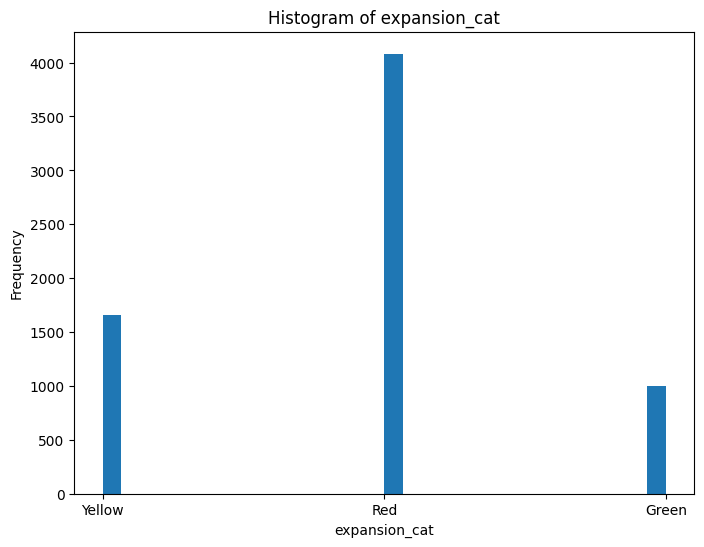

In [72]:
def histogram(data, variable):
    import pandas as pd
    import matplotlib.pyplot as plt

    # Check if the variable exists in the DataFrame
    if variable not in data.columns:
        raise ValueError(f"The variable '{variable}' does not exist in the DataFrame.")

    # Plotting the histogram
    plt.figure(figsize=(8, 6))
    data[variable].hist(bins=30)  # You can adjust the number of bins as needed
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Example usage:
histogram(data, 'expansion_cat')


In [70]:
print(data['expansion'].quantile(0.5))


0.0


# Modelling: predictive

### Regression

Cross-validation scores (R2): [0.0, -0.91, -0.52, -0.18, -0.32, -0.46, -0.06, 0.05, 0.02, -0.36]
Mean Squared Error: 14.29
R2 Score: -0.16
Mean Absolute Error: 1.0


/Users/patricksweeney/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_3/qcd4flhx2ss47cf1zvclnv540000gn/T/ipykernel_25220/4137867646.py:44: RuntimeWarning: invalid value encountered in log10
  adjusted_y_pred = np.log10(y_pred + offset)


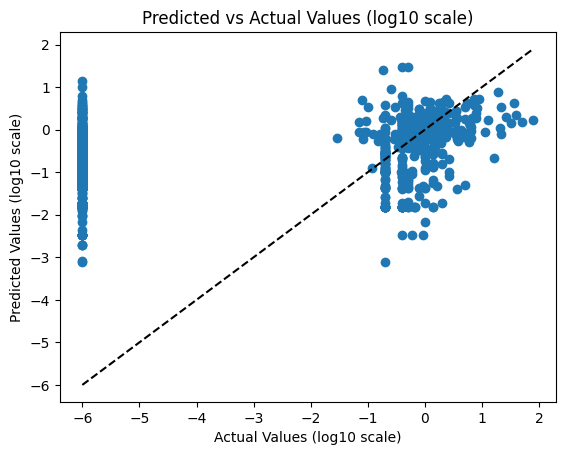

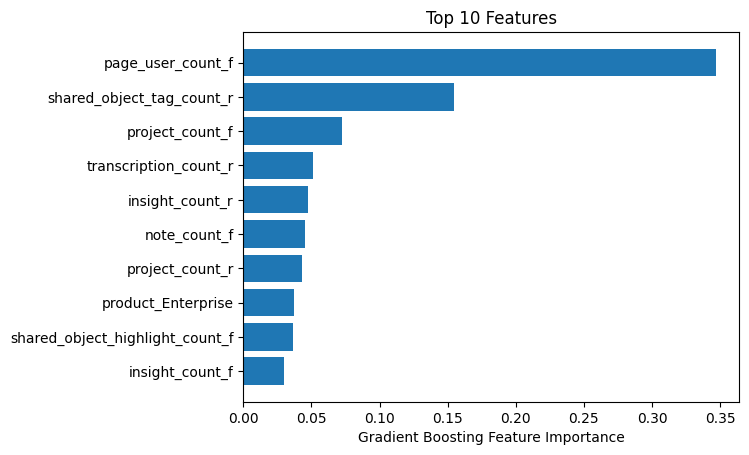

<Figure size 640x480 with 0 Axes>

In [76]:
def gradient_boosting_regression(data, y_variable, random_state=42):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split, cross_val_score, KFold
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import math
    from scipy.interpolate import UnivariateSpline

    # Separate the features and target variable
    X = data.drop(columns=[y_variable]).select_dtypes(include=np.number)
    y = data[y_variable]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # 1. Train model
    model = GradientBoostingRegressor(random_state=random_state)
    model.fit(X_train, y_train)

    # 2. Test model
    cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
    cross_val_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    # Rounding the scores to two decimal places
    rounded_scores = [round(score, 2) for score in cross_val_scores]
    print("Cross-validation scores (R2):", rounded_scores)

    # Predictions
    y_pred = model.predict(X_test)

    # 3. Performance Metrics
    mse = round(mean_squared_error(y_test, y_pred), 2)
    r2 = round(r2_score(y_test, y_pred), 2)
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"Mean Squared Error: {mse}")
    print(f"R2 Score: {r2}")
    print(f"Mean Absolute Error: {mae}")

    # 4. Plot Predictions vs Actual with adjusted log10 scale
    offset = 1e-6  # Small constant to offset zero or negative values
    adjusted_y_test = np.log10(y_test + offset)
    adjusted_y_pred = np.log10(y_pred + offset)

    plt.scatter(adjusted_y_test, adjusted_y_pred)
    plt.xlabel("Actual Values (log10 scale)")
    plt.ylabel("Predicted Values (log10 scale)")
    plt.title("Predicted vs Actual Values (log10 scale)")
    
    # Line for perfect predictions
    min_val = min(adjusted_y_test.min(), adjusted_y_pred.min())
    max_val = max(adjusted_y_test.max(), adjusted_y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--')

    plt.show()
    
    
    # 5. Feature Importance - Updated to show only top 10
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[-10:]  # Get the indices of the top 10 features
    
    plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel("Gradient Boosting Feature Importance")
    plt.title("Top 10 Features")
    plt.show()

    plt.tight_layout()
    plt.show()

    return model

model = gradient_boosting_regression(data, 'expansion')

### Classification

Cross-validation scores: [0.65462714 0.68164243 0.69625464 0.69002464 0.66296776 0.67620037
 0.68273025 0.68899285 0.66722905 0.65960404]
              precision    recall  f1-score   support

       Green       0.61      0.54      0.57       279
         Red       0.81      0.86      0.83       799
      Yellow       0.61      0.57      0.59       271

    accuracy                           0.73      1349
   macro avg       0.67      0.65      0.66      1349
weighted avg       0.73      0.73      0.73      1349

Confusion matrix:
[[150  92  37]
 [ 51 685  63]
 [ 44  73 154]]


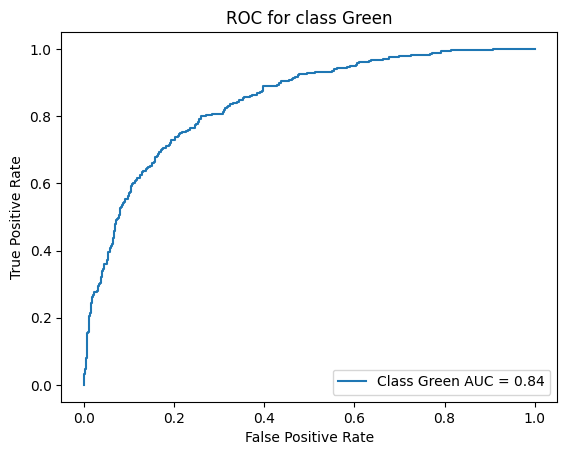

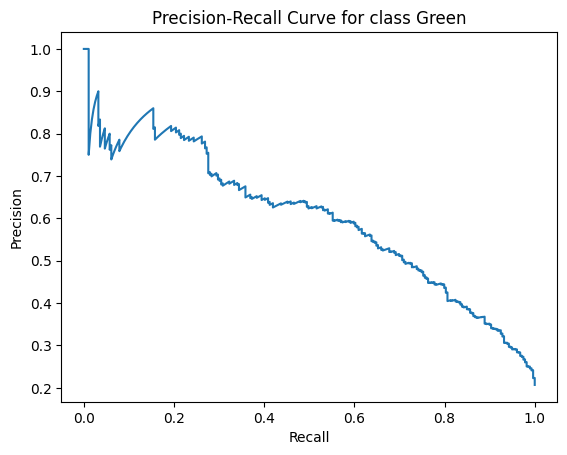

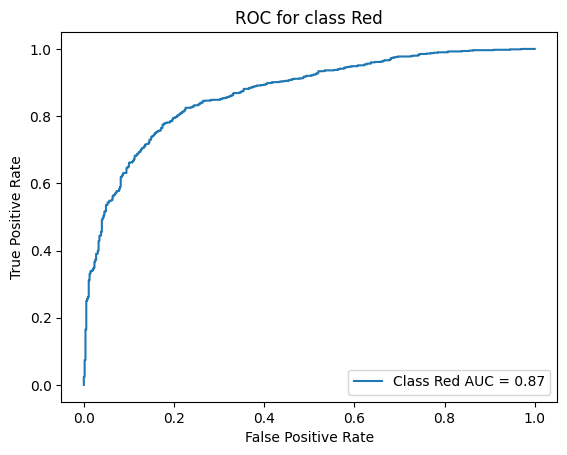

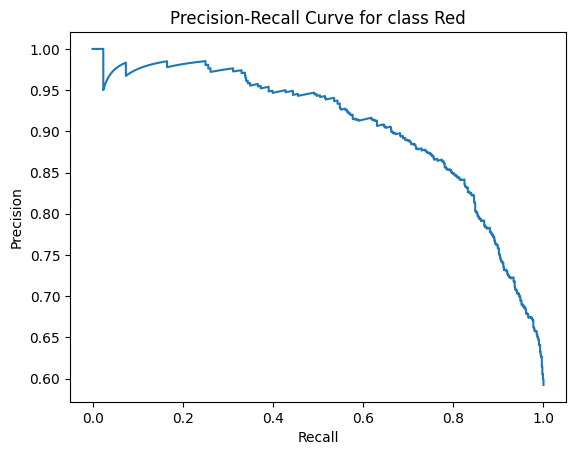

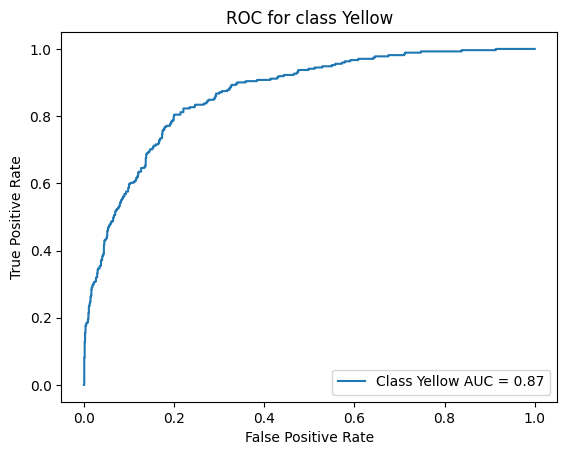

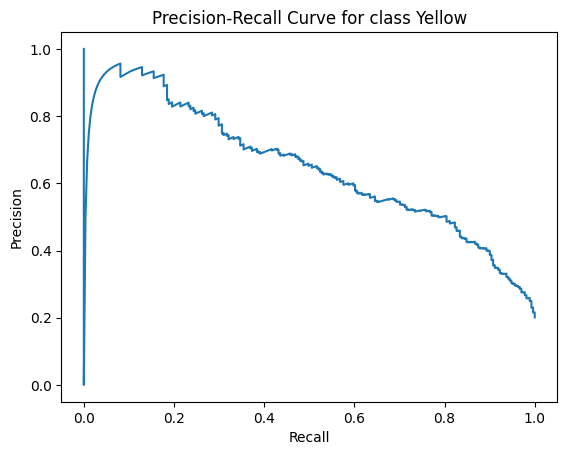

Average cross-validation score: 0.676027315841066
Cohen's Kappa: 0.5160354851504092


<Figure size 640x480 with 0 Axes>

In [74]:
def gradient_boosting(data, y_variable, exclude):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
    from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, cohen_kappa_score
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    random_state = 2
    
    # Ensure 'exclude' is a list
    if not isinstance(exclude, list):
        raise TypeError("'exclude' must be a list of columns.")

    # Separate features and target variable
    X = data.drop(columns=[y_variable] + exclude).select_dtypes(include=np.number)
    y = data[y_variable]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Train model
    model = GradientBoostingClassifier()
    model.fit(X_train, y_train)

    # Test model
    cv = StratifiedKFold(n_splits=10)
    cross_val_scores = cross_val_score(model, X, y, cv=cv, scoring='f1_macro')
    print("Cross-validation scores:", cross_val_scores)

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    # 4. Classification report
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Compute ROC, AUC, Precision-Recall for each class
    classes = np.unique(y)
    for i, cls in enumerate(classes):
        fpr, tpr, _ = roc_curve((y_test == cls).astype(int), y_proba[:, i])
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve((y_test == cls).astype(int), y_proba[:, i])
        
        # ROC Curve
        plt.figure()
        plt.plot(fpr, tpr, label='Class %s AUC = %0.2f' % (cls, roc_auc))
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC for class %s' % cls)
        plt.legend(loc="lower right")
        plt.show()

        # Precision-Recall Curve
        plt.figure()
        plt.plot(recall, precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve for class %s' % cls)
        plt.show()
    

    # # Compute and plot Lift Chart
    # df_lift = pd.DataFrame({'y_test': y_test, 'y_proba': y_proba})
    # df_lift = df_lift.sort_values(by='y_proba', ascending=False)
    # df_lift['decile'] = pd.qcut(df_lift['y_proba'], 10, labels=False)
    # df_lift['num_positive'] = df_lift['y_test'].cumsum()
    # df_lift['total'] = df_lift.index + 1
    # df_lift['lift'] = df_lift['num_positive'] / df_lift['total']

    
    # Cross-validation score
    print("Average cross-validation score:", np.mean(cross_val_scores))

    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    print("Cohen's Kappa:", kappa)

    plt.tight_layout()
    plt.show()
    
    return model


model_classifier = gradient_boosting(data, 'expansion_cat', exclude = ['workspace_id', 'expansion'])

# Modelling: Causal

In [75]:
data.head()

,workspace_id,expansion,annual,churned,start_date,end_date,t,project_count_r,transcription_count_r,note_count_r,...,shared_object_highlight_count_f,shared_object_tag_count_f,shared_object_insight_count_f,comment_count_f,reel_viewed_count_f,product_Business,product_Enterprise,product_Starter,product_Team,expansion_cat
0,02deacf1-5198-483d-9bca-376ad30c22dd,0.40,0,0,2022-02-11,2023-12-27,684,6,7,6,...,0.0,0.00731,0.097953,0,0.067251,0.0,0.0,0.0,1.0,Yellow
1,2f32ad80-80cf-454c-83b1-55d40e9c684b,0.00,0,1,2022-12-09,2023-03-08,89,27,20,19,...,0.0,0.00000,0.000000,0,0.000000,0.0,0.0,1.0,0.0,Red
2,2f671c70-030b-4202-a5fd-d6cb53b410a9,0.00,1,0,2023-11-03,2024-01-10,68,68,26,26,...,0.0,0.00000,0.000000,0,0.014706,0.0,0.0,1.0,0.0,Red
3,2fa16073-c492-45fe-8158-84ee254ff324,0.35,1,1,2021-10-01,2023-07-03,548,264,259,259,...,0.0,0.00000,0.001825,0,0.000000,0.0,0.0,0.0,1.0,Yellow
4,38a47213-69f6-483d-8bf6-7d89d6951e7d,0.00,0,0,2023-05-08,2024-01-10,247,69,100,23,...,0.0,0.00000,0.008097,0,0.000000,0.0,0.0,1.0,0.0,Red
